In [1]:
import numpy as np
from scipy.fftpack import fft,fft2
from matplotlib import pyplot as plt

In [66]:
l = np.load("data/000642.npy")

In [67]:
print("\nSum of l : ", np.sum(l))
print()
print("Sum of l(axis = 0) : ", np.sum(l, axis = 0)) 
print("Sum of l(axis = 1) : ", np.sum(l, axis = 1))
print("Sum of l(axis = -1) : ", np.sum(l, axis = -1))


Sum of l :  (770.64844-638.96875j)

Sum of l(axis = 0) :  [[-0.02292055-0.05350876j -0.05498505-0.13152504j -0.14938068+0.17759705j
  ... -0.16150475-0.05314636j  0.04846382-0.13959956j
  -0.21648431-0.153471j  ]
 [-0.0224638 -0.06267166j -0.04788971-0.13282394j -0.17141628+0.16136742j
  ... -0.14882374-0.06991386j  0.0612011 -0.13462114j
  -0.1971296 -0.17410457j]
 [-0.02049732-0.07175827j -0.04101944-0.1334076j  -0.19195461+0.14220142j
  ... -0.1340313 -0.08432579j  0.07342291-0.12826419j
  -0.17473984-0.1916306j ]
 ...
 [-0.01575375-0.02858734j -0.076828  -0.12304878j -0.07863617+0.20755386j
  ... -0.18359375+0.0074501j   0.00906563-0.14557457j
  -0.25222683-0.07866049j]
 [-0.01949453-0.03627014j -0.06958389-0.12666321j -0.10257053+0.20062637j
  ... -0.17912674-0.01405716j  0.02220249-0.14515233j
  -0.2443279 -0.10513401j]
 [-0.02189445-0.04464722j -0.06225586-0.12947083j -0.12631702+0.19065666j
  ... -0.1716938 -0.03437614j  0.03540516-0.14316742j
  -0.23233521-0.13026834j]]
Sum o

In [68]:
def cartesianToPolar(x, y):
    """ Cartesian to Polar """
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def polarToCartesian(rho, phi):
    """ Polar to Cartesian """
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def complexTo2Channels(target_array):
    """ transfer complex a + bi to [a, b]"""
    assert target_array.dtype == np.complex64
    output_array = getMagnitude(target_array)
    output_array = getLog(output_array)
    return output_array

def getMagnitude(target_array, power_order=2):
    """ get magnitude out of complex number """
    target_array = np.abs(target_array)
    target_array = pow(target_array, power_order)
    return target_array 

def getLog(target_array, scalar=1., log_10=True):
    """ get Log values """
    if log_10:
        return scalar * np.log10(target_array + 1.)
    else:
        return target_array

def getSumDim(target_array, target_axis):
    """ sum up one dimension """
    output = np.sum(target_array, axis=target_axis)
    return output 


def Cartesian(RA_mask, radar_config, gapfill_interval_num=1):
    # convert input (range_azimuth) to Cartesian for plotting
    output_mask = np.ones([RA_mask.shape[0], RA_mask.shape[0]*2]) * np.amin(RA_mask)
    point_angle_previous = None
    for i in range(RA_mask.shape[0]):
        for j in range(1, RA_mask.shape[1]):
            if RA_mask[i, j] > 0:
                point_range = ((radar_config["range_size"]-1) - i) * radar_config["range_resolution"]
                point_angle = (j * (2*np.pi/radar_config["azimuth_size"]) - np.pi) /(2*np.pi*0.5*radar_config["config_frequency"]/ radar_config["designed_frequency"])
                point_angle_current = np.arcsin(point_angle)
                if point_angle_previous is None:
                    point_angle_previous = point_angle_current
                for point_angle in np.linspace(point_angle_previous, point_angle_current, gapfill_interval_num):
                    point_zx = polarToCartesian(point_range, point_angle)
                    new_i = int(output_mask.shape[0] - np.round(point_zx[0]/radar_config["range_resolution"])-1)
                    new_j = int(np.round((point_zx[1]+50)/radar_config["range_resolution"])-1)
                    output_mask[new_i,new_j] = RA_mask[i, j] 
                point_angle_previous = point_angle_current
    return output_mask

In [69]:
RAD = l

RA = getLog(getSumDim(getMagnitude(RAD, power_order=2), target_axis = -1), scalar=10, log_10=True)
RD = getLog(getSumDim(getMagnitude(RAD, power_order=2), target_axis = 1), scalar=10, log_10=True)


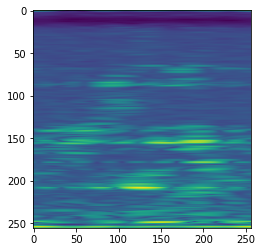

In [70]:
plt.imshow(RA)
plt.show()

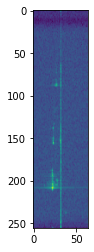

In [71]:
plt.imshow(np.abs(RD))
plt.show()

In [72]:
radar_config = {
				"designed_frequency" : 76.8,
				"config_frequency" : 77,
				"range_size" : 256,
				"doppler_size" : 64,
				"azimuth_size" : 256,
				"range_resolution" : 0.1953125,
				"angular_resolution" : 0.006135923,
				"velocity_resolution" : 0.41968030701528203
		}

In [73]:
RA_cart = Cartesian(RA, radar_config, gapfill_interval_num=1)

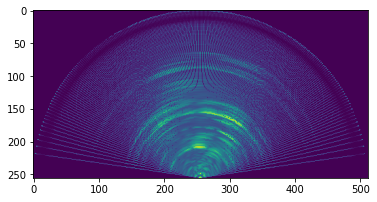

In [74]:
#interpolation with single gapfill interval
plt.imshow(RA_cart)
plt.show()

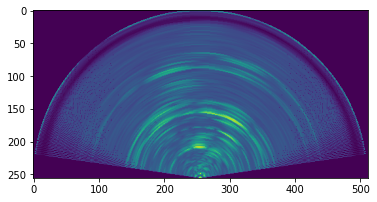

In [75]:
RA_cart1 = Cartesian(RA, radar_config, gapfill_interval_num=5)
plt.imshow(RA_cart1)
plt.show()

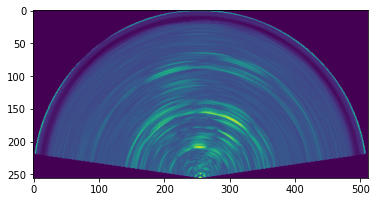

In [76]:
RA_cart2 = Cartesian(RA, radar_config, gapfill_interval_num=15)
plt.imshow(RA_cart2)
plt.show()

In [77]:
print(RD)

[[52.873688 52.864803 52.51449  ... 49.9157   52.00819  51.160446]
 [49.072018 52.980198 53.50771  ... 51.34644  51.600037 53.550568]
 [49.855827 51.553684 52.2155   ... 50.9999   53.505653 54.65197 ]
 ...
 [53.965767 53.642597 56.123676 ... 54.157528 56.569344 56.569817]
 [54.02309  52.01375  51.608776 ... 53.99307  50.94693  54.066147]
 [51.51156  52.262184 49.430813 ... 51.494137 48.454575 50.357315]]


In [78]:
def cfar(noise,ts,gs,offset,Ns):
    TRAINING_CELL_SIZE = T = ts
    GUARD_CELL_SIZE = G = gs
    OFF = offset
    threshold_cfar = [0]*len(noise)
    m = np.max(noise)
    for i in range(0,Ns - (GUARD_CELL_SIZE + TRAINING_CELL_SIZE)):
        n = np.mean(noise[i:i+T])
        t = n*OFF
        threshold_cfar[i] = t
        signal = noise[i+T+G]
        if signal < t:
            signal = 0.0
        else:
            signal = m+100
        noise[i] = signal
    return noise, threshold_cfar

In [115]:
import copy
y = copy.copy(RD.T)
rate_fa = 1.15
y_cfar = []
thresh = []
for i in range(64):
    x = y[i]
    z,threshold = cfar(x,4,1,rate_fa,len(x))
    y_cfar.append(z)
    thresh.append(threshold)

In [116]:
y_cfar = np.array(y_cfar)
y_cfar.shape

(64, 256)

In [117]:
thresh = np.array(thresh)
thresh.shape

(64, 256)

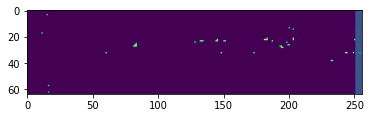

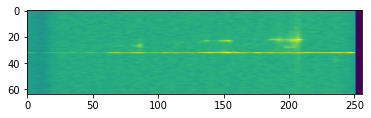

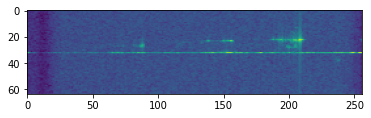

/tmp/ipykernel_88045/1222050895.py:7: RuntimeWarning: overflow encountered in power
  plt.imshow((thresh*y_cfar)**np.max(y_cfar))


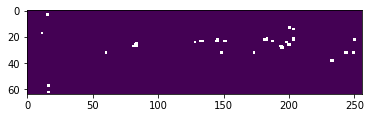

In [118]:
plt.imshow(y_cfar)
plt.show()
plt.imshow(thresh)
plt.show()
plt.imshow(RD.T)
plt.show()
plt.imshow((thresh*y_cfar)**np.max(y_cfar))

In [65]:
np.save("something.npy",y_cfar)

In [19]:
print((thresh*y_cfar)**np.max(y_cfar))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/tmp/ipykernel_88045/2063544354.py:1: RuntimeWarning: overflow encountered in power
  print((thresh*y_cfar)**np.max(y_cfar))


In [34]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=3, min_samples=2).fit(y_cfar)

In [35]:
set(cluster.labels_)

{-1, 0, 1, 2, 3}

In [36]:
ypred = cluster.fit_predict(y_cfar)

In [38]:
ypred

array([-1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,
        1, -1,  2,  3,  2,  3,  2,  2, -1,  2,  2,  2,  1,  2, -1, -1, -1,
       -1,  2,  2,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
        2,  2, -1,  2, -1, -1, -1,  2, -1, -1,  2, -1,  2])